In [3]:
"hello"

'hello'

In [4]:
# #Insatlling the libraries
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install -U scikit-learn
# !pip install seaborn

In [5]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Importing our DataSet
df=pd.read_csv('social_Network_Ads.csv')

In [7]:
#Analysing the dataset
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


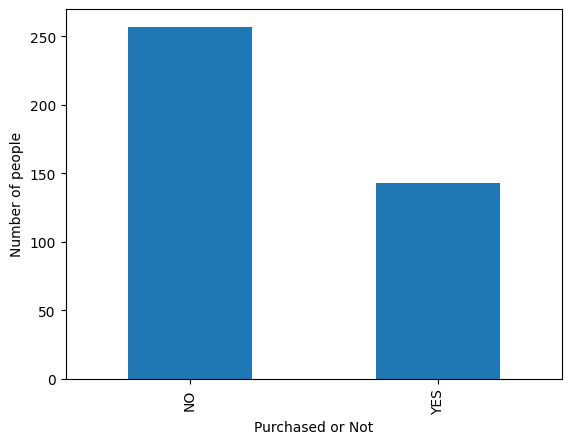

In [9]:
#Plotting the data to see the relationship between the features and independent variables.
df['Purchased'].value_counts().plot(kind='bar')
plt.xticks([0,1],labels=['NO','YES'])
plt.xlabel('Purchased or Not')
plt.ylabel('Number of people')
plt.show()

<Axes: xlabel='Purchased'>

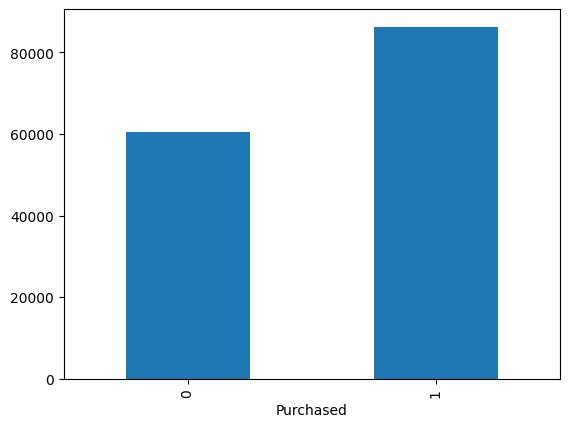

In [10]:
df.groupby('Purchased').mean()['EstimatedSalary'].plot(kind='bar')
#The plot shows people who purchased the product tend to have higher average incomes.

In [11]:
dfcopy=df.copy()
# sorted(dfcopy.Age.unique())

In [12]:
for i in [dfcopy]:
    i.loc[i['Age']<=30,'age_group']=30
    i.loc[(i['Age']>30)&(i['Age']<=40),'age_group']=40
    i.loc[(i['Age']>40)&(i['Age']<=50),'age_group']=50
    i.loc[i['Age']>50,'age_group']=60

In [13]:
dfcopy.head()

,Age,EstimatedSalary,Purchased,age_group
0,19,19000,0,30.0
1,35,20000,0,40.0
2,26,43000,0,30.0
3,27,57000,0,30.0
4,19,76000,0,30.0


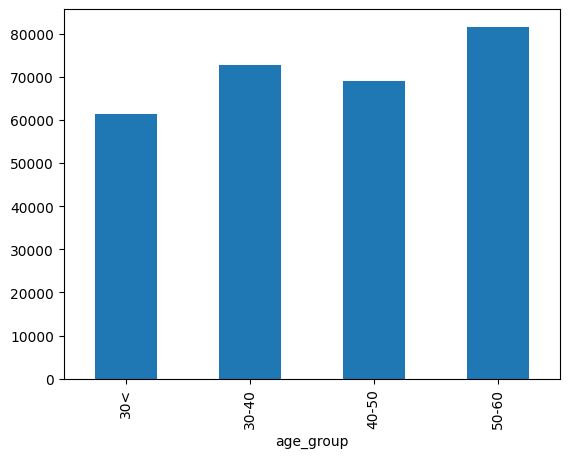

In [14]:
dfcopy.groupby('age_group').mean()['EstimatedSalary'].plot(kind='bar')
plt.xticks(np.arange(4),labels=['30<','30-40','40-50','50-60'])
plt.show()
#The following plot shows people with an age range of 50–60 have a higher average 
# of estimated salary.

In [15]:
age_group_pct=pd.crosstab(dfcopy['Purchased'],dfcopy['age_group']).apply(lambda x: x/x.sum()*100).round(1)

In [16]:
age_group_pct=age_group_pct.transpose()
age_group_pct

Purchased,0,1
age_group,,
30.0,94.6,5.4
40.0,76.8,23.2
50.0,39.8,60.2
60.0,8.2,91.8


In [17]:
age_group_pct.columns=['Not Purchased','Purchased']

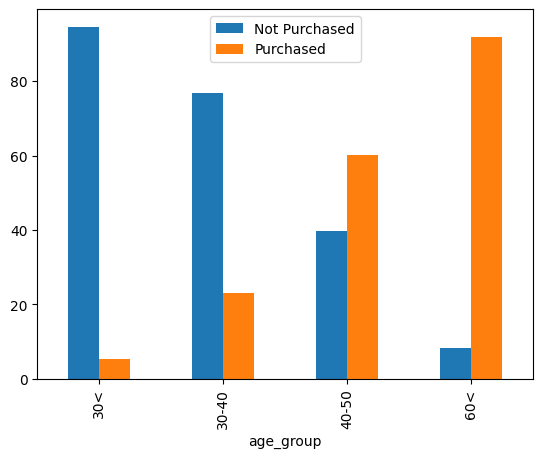

In [18]:
age_group_pct[['Not Purchased','Purchased']].plot(kind='bar')
plt.xticks(np.arange(4),labels=['30<','30-40','40-50','60<'])
plt.show()
#The plot shows that the percentage of purchases is highest among people aged 50 to 60, 
# and lowest among young people. 

In [19]:
#So after performing this exploratory analysis, 
# we know that people in the age range of 50 to 60 have higher estimated salaries, 
# and as the above graph shows, more than 80% of them have purchased the product.

In [20]:
#Now we will start processing our data to make it more suitable for prediction.

In [21]:
#First, we will divide our dataset into training and testing models based on age groups.

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=3,test_size=0.2,random_state=42)
for itrain, itest in split.split(dfcopy,dfcopy['age_group']):
    train_set=dfcopy.loc[itrain]
    test_set=dfcopy.loc[itest]

In [38]:
train_set.age_group.value_counts()/len(train_set)

40.0    0.356250
30.0    0.278125
50.0    0.243750
60.0    0.121875
Name: age_group, dtype: float64

In [34]:
test_set.age_group.value_counts()/len(test_set)

40.0    0.350
30.0    0.275
50.0    0.250
60.0    0.125
Name: age_group, dtype: float64

In [ ]:
#As you can see, the sklearn "StratifiedShuffleSplit" algorithm divided our dataset into 
#training and testing sets based on age group. 
#Similar percentages of each age group are present in both groups.

In [ ]:
#Now drop column 'age_group'

In [43]:
df2=train_set.copy()
df2.drop('age_group',axis=1,inplace=True)

In [46]:
df2.head(0)

,Age,EstimatedSalary,Purchased


In [ ]:
#Our target (Purchase) column will now be separated from the feature columns.

In [57]:
xtrain=df2[['Age','EstimatedSalary']]
ytrain=df2['Purchased']

In [ ]:
#Our model's performance may be impacted by the fact that 
#features age and estimated salary have different ranges. 
#Therefore, we will feature scale our data.

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
xattr=list(xtrain)
f_scale=ColumnTransformer([
    ('stdsc',StandardScaler(),xattr)
])

In [60]:
xprep=f_scale.fit_transform(xtrain)

In [64]:
pd.DataFrame(xprep,columns=xattr).head()

,Age,EstimatedSalary
0,-0.161938,-0.504988
1,1.853292,1.537208
2,-0.737718,0.516110
3,-1.697352,-0.592510
4,1.565402,1.012072


In [ ]:
#We will now apply the machine learning model to the data we just modified.

In [65]:
from sklearn.linear_model import LogisticRegression
log_clf=LogisticRegression(random_state=0)
log_clf.fit(xprep,ytrain)

LogisticRegression(random_state=0)

In [66]:
ypred=log_clf.predict(xprep)

In [ ]:
#We shall now assess our model's score.

In [71]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
def model_score(ypred):
    print('Confusion Matrix- \n',confusion_matrix(ytrain,ypred))
    print("Precision Score- ", precision_score(ytrain,ypred))
    print("Recall Score- ", recall_score(ytrain,ypred))

In [72]:
model_score(ypred)

Confusion Matrix- 
 [[191  15]
 [ 36  78]]
Precision Score-  0.8387096774193549
Recall Score-  0.6842105263157895


In [ ]:
#The aforementioned result indicates that, of all the identified values, 
#83% were truly positive, 
#and our model correctly predicted 68% of the true values.

In [ ]:
#We will now cross-validate our model using Sklearn's cross validate method.

In [111]:
from sklearn.model_selection import cross_validate
scorelog=cross_validate(log_clf,xprep,ytrain,scoring=['precision','recall'],cv=4)

In [ ]:
#Creatinng a function to cross validate our models.

In [184]:
def get_cvs(md,xtrain=xtrain,ytrain=ytrain):
    return cross_validate(md,xtrain,ytrain,scoring=['precision','recall'],cv=4)

In [118]:
def display_score(sc):
    nc=sc.copy()
    del nc["fit_time"]
    del nc["score_time"]
    print("Average Precision and Recall Score of the model from cross validation:- ")
    for i in nc:
        print(sc[i].mean())

In [186]:
display_score(scorelog)

Average Precision and Recall Score of the model from cross validation:- 
0.8412087912087913
0.6758004926108374


In [120]:
#Similar to how it did on our training dataset, 
#our model performed well in cross validations.

In [ ]:
#To train our data and obtain predictions, 
#we will now experiment with several other classification models.

In [122]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf=KNeighborsClassifier()
kn_clf.fit(xprep,ytrain)

KNeighborsClassifier()

In [ ]:
#Now getting our scores

In [126]:
display_score(get_cvs(kn_clf))

Average Precision and Recall Score of the model from cross validation:- 
0.754639681555004
0.6308497536945813


In [ ]:
#It appears that the KNeighborsClassifier model did not perform 
#adequately on our data set.

In [145]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=1)

In [146]:
display_score(get_cvs(forest_clf))

Average Precision and Recall Score of the model from cross validation:- 
0.8162287443867673
0.8512931034482758


In [ ]:
#As the above score suggests
#The best job out of all the models was done by RandomForestClassifier.

In [ ]:
#Hence, in order to further enhance our model's performance, 
#we are now tuning it using grid search.

In [166]:
from sklearn.model_selection import GridSearchCV
parms=[{'n_estimators':[100,150,50,200,80,120,130,90]}]

In [167]:
grid_search=GridSearchCV(forest_clf,parms,
                         scoring='precision',cv=5)

In [168]:
grid_search.fit(xprep,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid=[{'n_estimators': [100, 150, 50, 200, 80, 120, 130,
                                           90]}],
             scoring='precision')

In [169]:
grid_search.best_score_

0.8138311688311688

In [170]:
grid_search.best_params_

{'n_estimators': 120}

In [ ]:
#Thus, n_estimator=120 is the optimal parameter for our model.

In [ ]:
#Now we will try our model on test data.

In [172]:
test_set.drop('age_group',axis=1,inplace=True)

In [177]:
xtest=test_set.iloc[:,0:2]
ytest=test_set.Purchased

In [179]:
testprep=f_scale.fit_transform(xtest)

In [182]:
test_forest_clf=RandomForestClassifier(n_estimators=120)

In [187]:
display_score(get_cvs(test_forest_clf,xtest,ytest))

Average Precision and Recall Score of the model from cross validation:- 
0.9285714285714286
0.8616071428571429


In [ ]:
#Our classification model performed well, 
#with a precision score of 92% and recall score of 86%.